## Clustering: k-means and linkage-based clustering

In this notebook we are going to practice with the k-means and the linkage-based (called "agglomerative" in scikit learn) clustering algorithms.

In particular you are going to implement the k-means algorithm from scratch and to compare the results with the implementation already present in the sklearn library.

Student Name: Michele Puppin

ID Number: 1227474

In [1]:
# Load the required packages
# If a package is missing in your setup, install it with 'conda install <package_name>' 
# or with 'pip install <package_name>'
%matplotlib inline  

import numpy as np
import scipy as sp
import imageio as imio
import matplotlib.pyplot as plt

import sklearn
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
from sklearn.datasets import load_sample_image
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean

from mpl_toolkits.mplot3d import Axes3D #3d plotting functions
from matplotlib import pyplot
from PIL import Image

from copy import deepcopy  #deepcopy ensures that a copy of all the object data is performed (not just the pointers)

print ('scikit-learn version: ', sklearn.__version__)

/home/michelepuppin/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


scikit-learn version:  0.22.1


## TO DO:
    
Place your ID number in the ID variable, it will be used as random seed (as usual the random seed can affect a little bit the results, try to change it)

In [2]:
# fix your ID ("numero di matricola") and the seed for random generator
ID = 1227474
np.random.seed(ID)

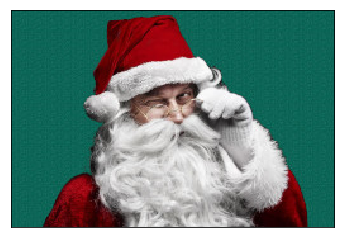

Santa Claus image:  (172, 256, 3)


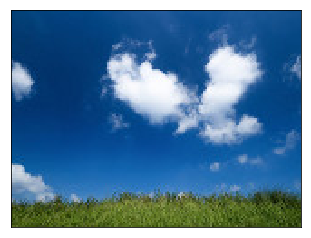

Landscape image:  (120, 160, 3)


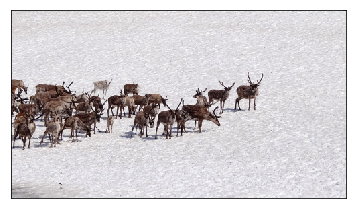

Reindeer image:  (281, 500, 3)


In [3]:
# load the provided images and display them (if you like you can experiment with other images)
image1 = imio.imread('data/santaclaus2.jpg')
image2  = imio.imread("data/landscape.jpg")
image3  = imio.imread("data/reindeer.jpg")

ax = plt.axes(xticks=[], yticks=[])
ax.imshow(image1)
plt.show()
print("Santa Claus image: ",image1.shape)

ax2 = plt.axes(xticks=[], yticks=[])
ax2.imshow(image2)
plt.show()
print("Landscape image: ",image2.shape)

ax3 = plt.axes(xticks=[], yticks=[])
ax3.imshow(image3)
plt.show()
print("Reindeer image: ",image3.shape)

We are going to start by using the Santa Claus image.


In [4]:
# reshape the data to a matrix of num_pixels x 3 
# (divide by 255 to have colors in [0 1] range for plotting functions of sklearn)

data = image1.reshape(image1.shape[0]*image1.shape[1], 3)/255

print(data.shape)
print(data)

(44032, 3)
[[0.05490196 0.4        0.34509804]
 [0.05098039 0.39607843 0.34117647]
 [0.05098039 0.39607843 0.34117647]
 ...
 [0.05882353 0.40392157 0.34901961]
 [0.05882353 0.40392157 0.34901961]
 [0.05882353 0.40392157 0.34901961]]


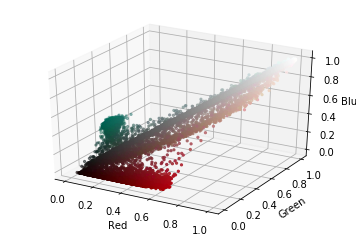

In [5]:
# Plot the points in the 3-dimensional space with normalized intervals between 0 and 1
# (corresponding to the three channels of the image, i.e. Red Green and Blue)

fig = pyplot.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")
r, g, b = list(data[:,0]), list(data[:,1]), list(data[:,2])

axis.scatter(r, g, b, c=data, s=5, marker="o")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
pyplot.show()

## TO DO 1
Implement the k-means algorithm manually (**do not use the kmeans function of sklearn and do not download implementations from other web sources**). The inputs to the function is the set of vectors to be clustered and the number of clusters. The output must contain the clusters barycenters, a vector associating each data point to the corresponding cluster and the error (value of the cost function) at each iteration.
Additionally, fix a maximum number of iterations of the k-means algorithm (e.g., 50).

Be careful about the initalization, you can use some random points from the training set, or get random values but ensure they are in the proper range. Poor initalizations can lead to the failure of the algorithm (in particular check that no cluster is initialized as empty, otherwise the algorithm can not update it).

In [6]:
def my_kmeans(points, k):
    max_iters = 50
    
    clusters = np.zeros(points.shape[0])
    distances = np.zeros(points.shape[0])
    error = []
        
    centroids = np.zeros((3,3))
    centroids[0] = points[np.random.randint(0,points.shape[0])]
    centroids[1] = points[np.random.randint(0,points.shape[0])]
    centroids[2] = points[np.random.randint(0,points.shape[0])]  
    
    steps = 1

    while steps <= max_iters:
        cluster = [ [] for i in range(k)]
        distance = np.array([])

        for v in points:
            distance = []
            for i in centroids:
                distance.append(np.linalg.norm(i-v))
            cluster[np.argmin(distance)].append(v)
        
        distances = sp.spatial.distance.cdist(points,centroids,'euclidean')      
        clusters = np.argmin(distances,axis = 1)

        for i in range(k):
            new_centroids = np.array([0., 0., 0.])
            for v in cluster[i]:
                new_centroids = np.add(new_centroids,v)
            centroids[i] = new_centroids / len(cluster[i])

        errors = 0
        for m in points:
            errors += min([(np.linalg.norm(m-n))**2 for n in centroids])
        error.append(errors)
        
        print("\n\nIteration: ", steps, "\nCentres: ", centroids , "\nError: ", errors)
                
        if steps >= 5 and (error[steps - 2] <= error[steps - 3] + 0.1): 
            break;
            
        steps += 1
    
    return centroids, clusters, error

## TO DO 2:

Now try the function you developed on the Santa Claus image with three clusters (k=3). 

Then plot the data points in the 3-dimensional space, each point must be coloured based on the membership to one of the clusters. Additionally, plot the respective clusters centroids (use a different shape, size or color to highlight the centroids).

In [7]:
mykmeans_centers,clusters,error = my_kmeans(data,3)



Iteration:  1 
Centres:  [[0.38782396 0.036459   0.05244344]
 [0.07383043 0.39166815 0.33937563]
 [0.76720678 0.75614951 0.75323543]] 
Error:  1102.5711101757117


Iteration:  2 
Centres:  [[0.3931155  0.04812462 0.06212809]
 [0.07828298 0.39364435 0.34209761]
 [0.77781751 0.76801143 0.76528744]] 
Error:  1093.3218820022698


Iteration:  3 
Centres:  [[0.39291404 0.05162428 0.06517536]
 [0.07889193 0.39436573 0.34286356]
 [0.77959807 0.76999787 0.76730648]] 
Error:  1092.92666186749


Iteration:  4 
Centres:  [[0.39267537 0.05300225 0.06636065]
 [0.0788091  0.39460428 0.34308139]
 [0.77992885 0.77037787 0.76769853]] 
Error:  1092.8840489470447


Iteration:  5 
Centres:  [[0.39260098 0.05365145 0.06692108]
 [0.07866559 0.3946886  0.34314701]
 [0.77998175 0.77044226 0.76776639]] 
Error:  1092.8770581272834


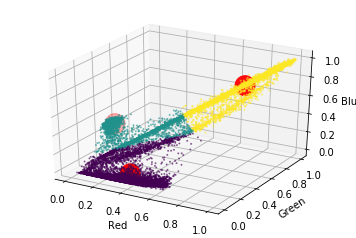

In [8]:
fig = pyplot.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
axis.scatter(r, g, b, marker="o", c=clusters, s=1, cmap='viridis', zorder=0, alpha=0.5 )
axis.scatter(mykmeans_centers[:,0], mykmeans_centers[:,1], mykmeans_centers[:,2], c='red', s=400, zorder=10)
pyplot.show()

### TO DO 3: 
Plot the value of the error versus the number of iterations

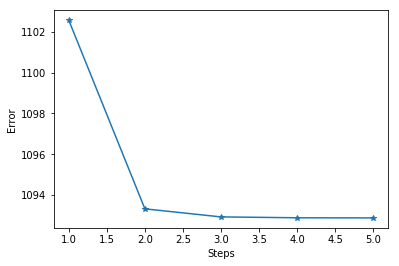

In [9]:
steps = [i+1 for i in range(len(error))]
plt.plot(steps,error,'-*')
plt.xlabel("Steps")
plt.ylabel("Error")
plt.show()

### TO DO 4:
Now use the k-means function provided in sklearn. Pass to the function the number of clusters and use multiple random initializations (n_init parameter). Go to the documentation page for further details

In [10]:
kmeans =  KMeans(n_clusters=3, n_init=10)

obt = kmeans.fit(data)

print("my-kmeans: \n", mykmeans_centers, "\n")
print("sklearn: \n", obt.cluster_centers_)

my-kmeans: 
 [[0.39260098 0.05365145 0.06692108]
 [0.07866559 0.3946886  0.34314701]
 [0.77998175 0.77044226 0.76776639]] 

sklearn: 
 [[0.07847365 0.39468894 0.34313193]
 [0.77988785 0.77030481 0.76761854]
 [0.39262661 0.05386229 0.0671155 ]]


### TO DO 5:
Perform the same plot as above but with the output of the k-means function provided in sklearn.

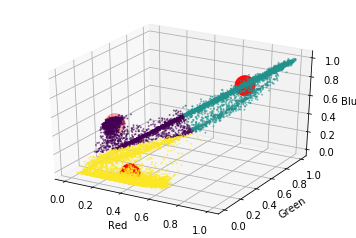

In [11]:
fig = pyplot.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
axis.scatter(r, g, b, marker="o", c=obt.labels_, s=1, cmap='viridis', zorder=0, alpha=0.5 )
axis.scatter(obt.cluster_centers_[:,0], obt.cluster_centers_[:,1], obt.cluster_centers_[:,2], c='red', s=400, zorder=10)
pyplot.show()

## Question 1: 

Compare the results obtained with your implementation and with k-means from sklearn. Do you observe any differences, i.e., do the two plots match? 

Centers found for centroids in both cases are very similar and plots look the same. 

### TO DO 6:

Now display the segmented image based on the 3 clusters found above with both the k-means functions by sklearn and your k-means implementation

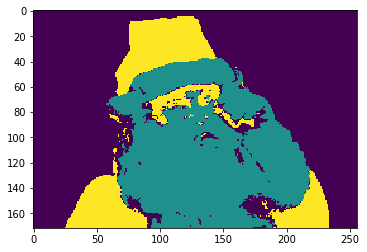

In [12]:
plt.imshow(obt.labels_.reshape(image1.shape[0],image1.shape[1]))

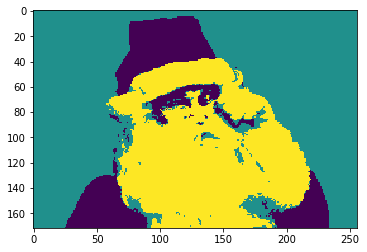

In [13]:
plt.imshow(clusters.reshape(image1.shape[0],image1.shape[1]))

## Question 2: 

What do you observe? Do you think clustering is useful for image segmenation? And for image compression?  Comment your answer.

You still can get clearly the content of the image. Again two methods produce the same results. Clustering can be useful for image segmentation since it allows to recognise different significative regions. In this way it could be useful for compression helping reducing the number of information (colors of pixels) to be store to rapresent effectively the same image.

## TO DO 8:

Now load the landscape image (optional: try also with the reindeer image) and segment it using kmeans with k varying from 2 to 15 clusters. You can use the sklearn implementation.

Then plot the resulting data points in the 3-dimensional space, each point must be colored based on the cluster membership. 
Additionally, plot the respective clusters centroids.



(19200, 3)


/home/michelepuppin/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/home/michelepuppin/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/home/michelepuppin/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/home/michelepuppin/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/home/michelepuppin/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning:

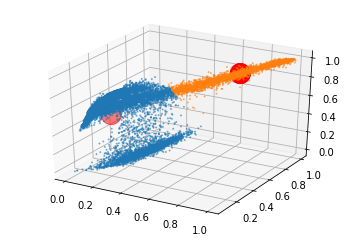

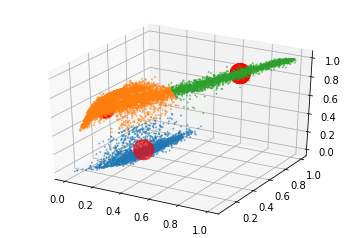

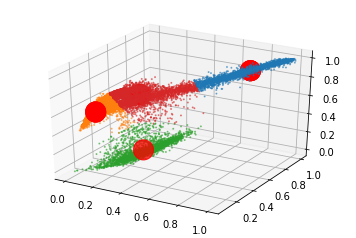

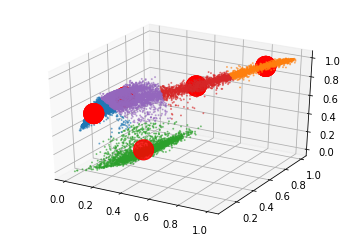

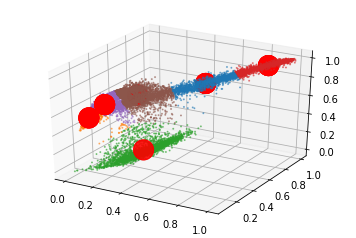

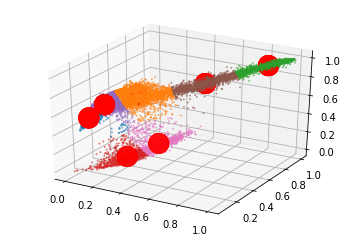

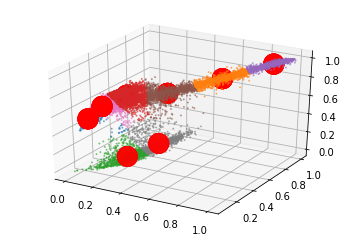

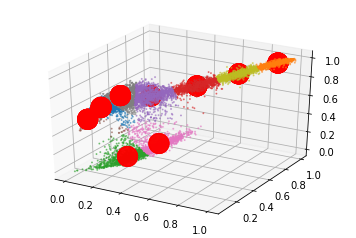

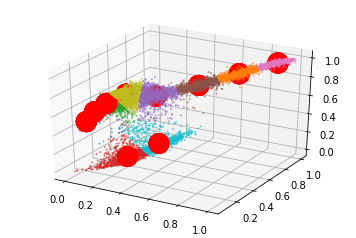

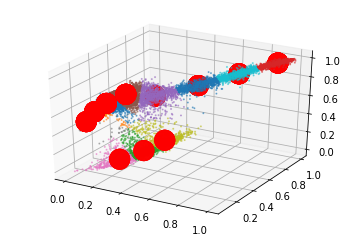

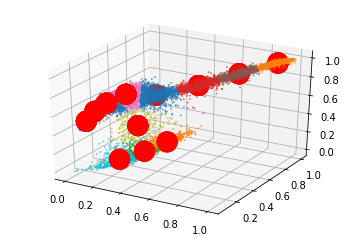

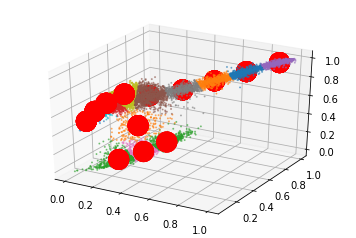

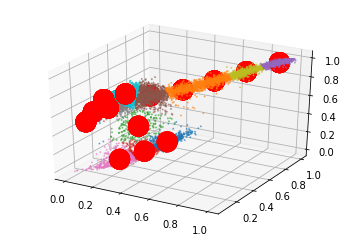

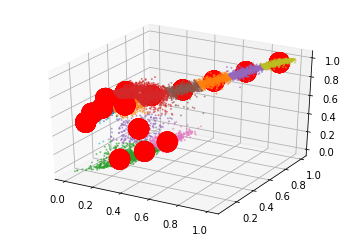

In [14]:
data = image2.reshape(image2.shape[0]*image2.shape[1], 3) / 255
print(data.shape)

inertia=[]
labels=[] 
    
for k in range(2,16):
    fig = pyplot.figure()
    axis = fig.add_subplot(1, 1, 1, projection = '3d')
    kmeans = KMeans(n_clusters=k,n_init=10).fit(data)
    labels.append(kmeans.labels_)
    inertia.append(kmeans.inertia_)
    centers = kmeans.cluster_centers_ 
    
    for j in range(0,k):
        ppc_=data[labels[-1] == j]
        r, g, b = list(ppc_[:,0]), list(ppc_[:,1]), list(ppc_[:,2])
        axis.scatter(r, g, b, marker="o", s=1, cmap='viridis', zorder=0, alpha=0.5 )
        axis.scatter(centers[:,0], centers[:,1], centers[:,2], 'o', c='red', s=400)
    fig.show()

## TO DO 9:

Plot for different values of k (e.g. k between 2 and 15) the respective error of the kmeans algorithm 

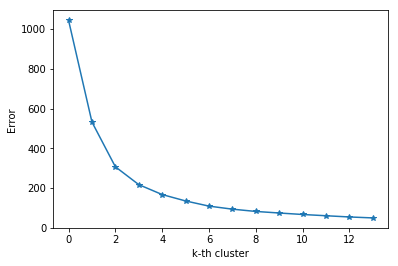

In [15]:
plt.plot(inertia,'-*')
plt.xlabel("k-th cluster")
plt.ylabel("Error")
plt.show()

##  Question 3:

Compare the results with different values of k, what do you observe? 

Analyze also the error, which one do you think is the optimal value of k ?

Is there a single, clear answer ? 

I observe that at a certain point the number of cluster is too large and it doesn't reflect spatial division of data in the 3d plot. 
Errors decends rapidly then tend to stabilize so that errors don't improve significantly as the number of clusters increase. So the optimal number of cluster could be around 3/4 and also graphically a larger number of cluster seem unuseful but I think there is no clear answer since it could depend on the aim of the analysis. 

## Linkage-based clustering

The second part of the assignment concern instead linkage-based clustering. We will use the AgglomerativeClustering module of sklearn. 

In [16]:
# Import required packages
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics, datasets
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler


# Load sample data
data = np.load('data/moon_data.npz')
print(data.files)
X = data['X']
labels_true = data['labels_true']

['X', 'labels_true']


### TO DO 10: 

Now exploit the AgglomerativeClustering algorithm on the provided sample data points. Use the "single" linkage type that correspond to the minimum distance criteria seen in the lectures and 2 clusters. Notice that the "single" option has been introduced recently in sklearn, if you get an error ensure you have a recent version of the library. Plot the resulting clustering.

In [17]:
# #############################################################################
# Compute Agglomerative Clustering

db = AgglomerativeClustering(n_clusters=2,linkage='single').fit(X)

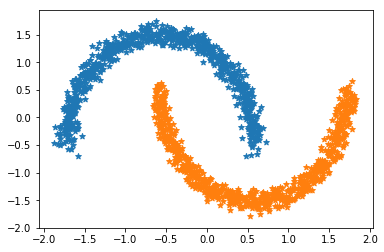

In [18]:
cluster_a = X[db.labels_==0]
cluster_b = X[db.labels_==1]

plt.scatter(cluster_a[:,0], cluster_a[:,1], marker="*")
plt.scatter(cluster_b[:,0], cluster_b[:,1], marker="*")

### TO DO 11: 

Now try the KMeans with two clusters on the same dataset we used for the AgglomerativeClustering algorithm.

In [19]:
kmeans = KMeans(n_clusters=2,n_init=10).fit(X)

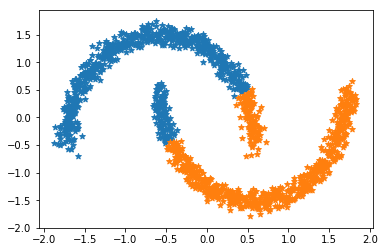

In [20]:
cluster_a = X[kmeans.labels_==0]
cluster_b = X[kmeans.labels_==1]

plt.scatter(cluster_a[:,0], cluster_a[:,1], marker="*")
plt.scatter(cluster_b[:,0], cluster_b[:,1], marker="*")

In [21]:
print(type(kmeans.labels_))

<class 'numpy.ndarray'>


## Question 4:

Compare the results of K-means and Agglomerative Clustering and explain what you observe and why?



Agglomerative Clustering performs a much better division betwen the two clusters. The difference can be explained by the fact that in K-means the alrigorithm starts from a random choice of two centers for the cluster so it's influenced by this random choice. Agglomerative Clustering instead starts from the data itself so it can catch the real division of the data. 